# Aula 1 - Tratando os dados


In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando a base de dados
df_cadastrados = pd.read_csv("/content/clientes_cadastrados.csv", sep=',')

In [3]:
df_cadastrados.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [4]:
print("Cadastrados:", df_cadastrados.shape)

Cadastrados: (438557, 18)


In [5]:
df_cadastrados['ID_Cliente'].value_counts()

,count
ID_Cliente,
7137299,2
7702238,2
7282535,2
7243768,2
7050948,2
...,...
5690727,1
6621262,1
6621261,1


In [6]:
# Verificando registros duplicados da coluna ID_Cliente
df_cadastrados[df_cadastrados['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

In [7]:
# Armazenando os duplicados na variavel
id_repetidos = df_cadastrados[df_cadastrados['ID_Cliente'].duplicated(keep=False)]

In [8]:
# retirando os valores duplicados
df_cadastrados_limpo = df_cadastrados.drop(id_repetidos.index)

In [9]:
df_cadastrados_limpo.shape

(438463, 18)

In [10]:
df_cadastrados_limpo['ID_Cliente'].value_counts()

,count
ID_Cliente,
5008804,1
6147691,1
6147689,1
6147688,1
6147685,1
...,...
6093492,1
5690720,1
6538938,1


In [11]:
df_cadastrados_limpo.isnull().sum()

,0
ID_Cliente,0
Genero,0
Tem_carro,0
Tem_casa_propria,0
Qtd_filhos,0
Rendimento_anual,0
Categoria_de_renda,0
Grau_escolaridade,0
Estado_civil,0
Moradia,0


In [12]:
df_cadastrados_limpo['Ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [13]:
df_cadastrados_limpo['Ocupacao'].fillna(value = 'Outro', inplace=True)

<ipython-input-13-02188f78476d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cadastrados_limpo['Ocupacao'].fillna(value = 'Outro', inplace=True)


In [14]:
df_cadastrados_limpo.isnull().sum()

,0
ID_Cliente,0
Genero,0
Tem_carro,0
Tem_casa_propria,0
Qtd_filhos,0
Rendimento_anual,0
Categoria_de_renda,0
Grau_escolaridade,0
Estado_civil,0
Moradia,0


In [15]:
# Numero de valores por colunas
df_cadastrados_limpo.nunique()

,0
ID_Cliente,438463
Genero,2
Tem_carro,2
Tem_casa_propria,2
Qtd_filhos,12
Rendimento_anual,866
Categoria_de_renda,5
Grau_escolaridade,5
Estado_civil,5
Moradia,6


In [16]:
# Removendo colunas
df_cadastrados_limpo.drop('Genero', axis=1, inplace=True)
df_cadastrados_limpo.drop('Tem_celular', axis=1, inplace=True)


In [17]:
df_cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

In [18]:
print('Tem carro: ', df_cadastrados_limpo['Tem_carro'].unique())
print('Tem casa propria: ',df_cadastrados_limpo['Tem_casa_propria'].unique())

Tem carro:  ['Y' 'N']
Tem casa propria:  ['Y' 'N']


In [19]:
# Alterando os valores para inteiro
df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace(['Y', 'N'], [1,0])
df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace(['Y', 'N'], [1,0])

<ipython-input-19-b156f66dd714>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace(['Y', 'N'], [1,0])
<ipython-input-19-b156f66dd714>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace(['Y', 'N'], [1,0])


In [20]:
print('Tem carro: ', df_cadastrados_limpo['Tem_carro'].unique())
print('Tem casa propria: ',df_cadastrados_limpo['Tem_casa_propria'].unique())

Tem carro:  [1 0]
Tem casa propria:  [1 0]


In [21]:
# Acertando o valor do campo idade
df_cadastrados_limpo['Idade'] = - df_cadastrados_limpo['Idade'] / 365.2425

In [22]:
# Acertando o valor do campo anos empregado
df_cadastrados_limpo['Anos_empregado'] = - df_cadastrados_limpo['Anos_empregado'] / 365.2425

In [23]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


In [24]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

,count
Anos_empregado,
-1000.001369,75314
0.596864,262
4.594208,251
0.681739,241
2.677673,240
...,...
37.041144,1
27.989623,1
24.413917,1


In [25]:
# Alterando o valor que esta negativo para valor 0
df_cadastrados_limpo.loc[df_cadastrados_limpo['Anos_empregado'] < 0, 'Anos_empregado'] = 0

In [26]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

,count
Anos_empregado,
0.000000,75314
0.596864,262
4.594208,251
0.681739,241
2.677673,240
...,...
37.041144,1
27.989623,1
24.413917,1


<Axes: >

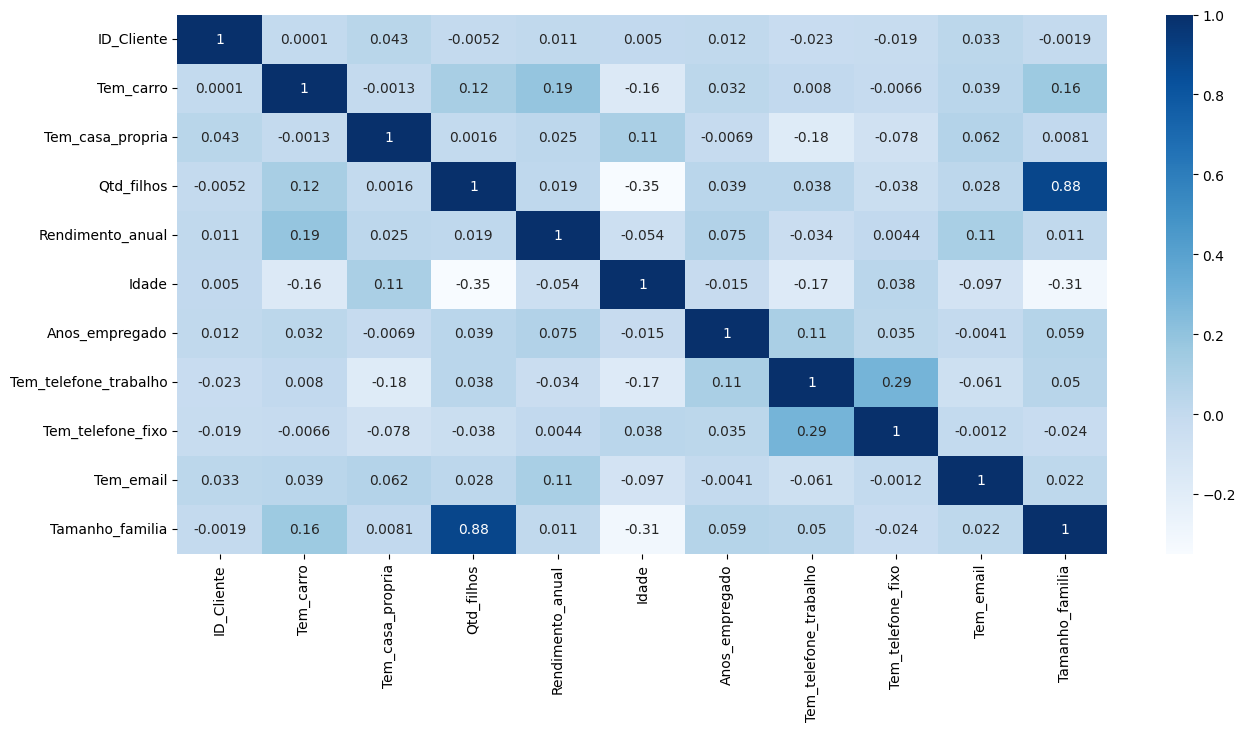

In [27]:
# Verificando correlação apenas para colunas numéricas
corr = df_cadastrados_limpo.select_dtypes(include=np.number).corr()

# Criando grafico
plt.figure(figsize=(15,7))
sns.heatmap(corr, cmap='Blues', annot=True)

In [28]:
# removendo a coluna devido a alta correlação - overFit

df_cadastrados_limpo.drop('Qtd_filhos', axis=1, inplace=True)

In [29]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


In [30]:
# Ordenando as colunas
df_cadastrados_limpo = df_cadastrados_limpo[['ID_Cliente', 'Tem_carro', 'Tem_casa_propria','Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email','Tamanho_familia', 'Rendimento_anual','Idade','Anos_empregado','Categoria_de_renda',
                                            'Grau_escolaridade','Estado_civil','Moradia','Ocupacao']]

In [31]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


In [32]:
df_cadastrados_limpo['Categoria_de_renda'].value_counts(normalize=True).mul(100).round(2)

,proportion
Categoria_de_renda,
Empregado,51.56
Associado comercial,22.97
Pensionista,17.21
Servidor público,8.25
Estudante,0.00


In [33]:
df_cadastrados_limpo['Grau_escolaridade'].value_counts(normalize=True).mul(100).round(2)

,proportion
Grau_escolaridade,
Ensino médio,68.82
Ensino superior,26.80
Ensino superior incompleto,3.39
Ensino fundamental,0.92
Pós-graduação,0.07


In [34]:
df_cadastrados_limpo['Moradia'].value_counts(normalize=True).mul(100).round(2)

,proportion
Moradia,
Casa/apartamento próprio,89.80
Mora com os pais,4.35
Habitação pública,3.24
Apartamento alugado,1.36
Apartamento comercial,0.89
Cooperativa habitacional,0.35


In [35]:
# Cálculo dos percentuais com normalização e arredondamento em uma única linha de código
df_cadastrados_limpo['Estado_civil'].value_counts(normalize=True).mul(100).round(2)


,proportion
Estado_civil,
Casado,68.37
Solteiro,12.60
União-estável,8.33
Divorciado,6.21
Viúvo,4.49


# Aula 2 - Criando a variável target

## Video - Criando a variavel target - I

In [36]:
# Importando a base de dados
df_aprovados = pd.read_csv("/content/clientes_aprovados.csv", sep=',')

In [37]:
df_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [38]:
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [39]:
df_aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [40]:
df_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [41]:
df_aprovados.Faixa_atraso.value_counts()

,count
Faixa_atraso,
pagamento realizado,442031
1-29 dias,383120
nenhum empréstimo,209230
30-59 dias,11090
>150 dias,1693
60-89 dias,868
90-119 dias,320
120-149 dias,223


In [42]:
# Criando variavel para calcular a abertura de credito

df_registros_credito_agruppados_ID = df_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_credito_agruppados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura.head()

<ipython-input-42-1aceaaa364ea>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ser_abertura = df_registros_credito_agruppados_ID.apply(lambda x: min(x['Mes_referencia']))


,Abertura
ID_Cliente,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59


In [43]:
# Merge nos DF
df_clientes_aprovados = df_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [44]:
# Criando variavel para calcular a final de credito
ser_final = df_registros_credito_agruppados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final.head()

<ipython-input-44-a1ab07416a84>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ser_final = df_registros_credito_agruppados_ID.apply(lambda x: max(x['Mes_referencia']))


,Final
ID_Cliente,
5001711,0
5001712,0
5001713,0
5001714,0
5001715,0


In [45]:
# Merge nos DF
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [46]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [47]:
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [48]:
df_clientes_aprovados['Faixa_atraso'].unique()

array(['nenhum empréstimo', '1-29 dias', 'pagamento realizado',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [49]:
#Criar dicionario
dict_faixa_atraso_ind = {'nenhum empréstimo':0,
                         'pagamento realizado':1,
                         '1-29 dias':2,
                         '30-59 dias':3,
                         '60-89 dias':4,
                         '90-119 dias':5,
                         '120-149 dias':6,
                         '150-179 dias':7,
                        }

In [50]:
df_clientes_aprovados['ind_faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,ind_faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0.0
1,5001711,-1,1-29 dias,-3,0,3,2,2.0
2,5001711,-2,1-29 dias,-3,0,3,1,2.0
3,5001711,-3,1-29 dias,-3,0,3,0,2.0
4,5001712,0,pagamento realizado,-18,0,18,18,1.0


In [51]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['ind_faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,ind_faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0.0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2.0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2.0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2.0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1.0,0


In [52]:
df_registros_credito_ID = df_clientes_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_credito_ID

<ipython-input-52-94a28feb6b97>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_registros_credito_ID = df_clientes_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)


,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [53]:
df_denomidador = df_registros_credito_ID.groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_denomidador.columns = ['Abertura', 'qtd_clientes']
df_denomidador


<ipython-input-53-7c7c5dc45848>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_denomidador = df_registros_credito_ID.groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()


,Abertura,qtd_clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


## Video - Criando a variavel target - II

In [54]:
df_vintage = df_clientes_aprovados.groupby(['Abertura', 'MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura', 'MOB', 'qtd_clientes']
df_vintage

<ipython-input-54-26a667008c5d>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vintage = df_clientes_aprovados.groupby(['Abertura', 'MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()


,Abertura,MOB,qtd_clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [55]:
df_vintage = pd.merge(df_vintage[['Abertura', 'MOB']], df_denomidador, on='Abertura', how='left')
df_vintage

,Abertura,MOB,qtd_clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [56]:
df_vintage['qtd_mau'] = np.nan

for j in range(-60, 1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB ==@i and Abertura ==@j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'qtd_mau'] = len(set(ls))
df_vintage['Taxa_de_mau'] = df_vintage['qtd_mau'] / df_vintage['qtd_clientes']
df_vintage

,Abertura,MOB,qtd_clientes,qtd_mau,Taxa_de_mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [57]:
df_vintage_pivot = df_vintage.pivot(index='Abertura', columns='MOB', values='Taxa_de_mau')
df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.024631,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.027094,0.027094,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.005000,0.005000,...,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.036170,0.036170,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.001144,0.001144,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


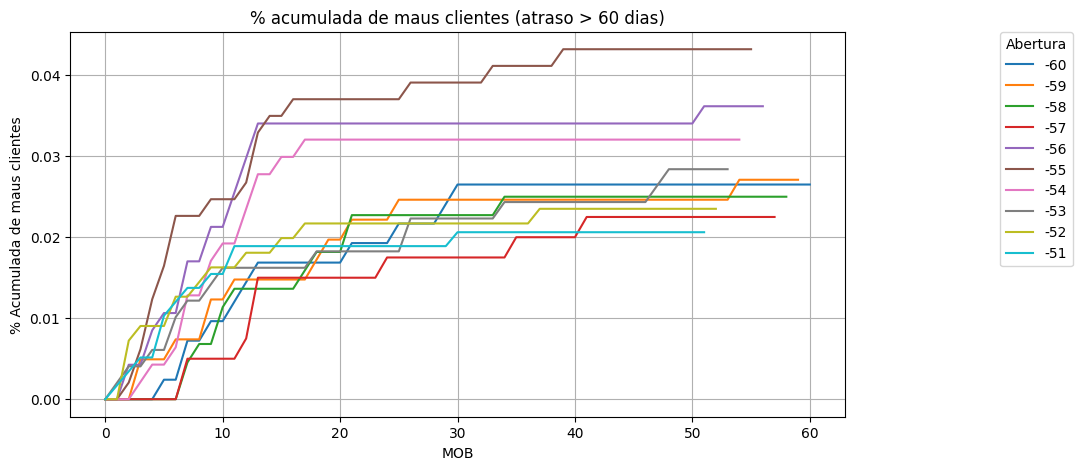

In [58]:
lst = [i for i in range(0, 61)]
df_vintage_pivot[lst].T.iloc[:, :10].plot(legend=True, grid=True, title = '% acumulada de maus clientes (atraso > 60 dias)', figsize=(10,5))
plt.xlabel('MOB')
plt.ylabel('% Acumulada de maus clientes')
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0., title='Abertura')


Text(0, 0.5, '% de Clientes')

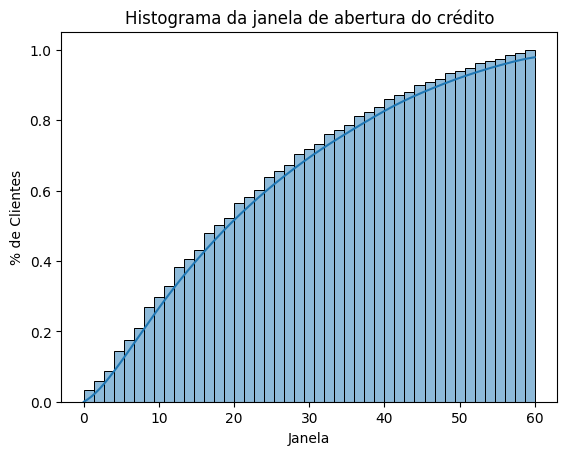

In [59]:
sns.histplot(data=df_registros_credito_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Histograma da janela de abertura do crédito')
plt.xlabel('Janela')
plt.ylabel('% de Clientes')

## Video - Criando a variavel target - III

In [60]:
dict_intervalo_atraso = {'maior_30_dias':3, 'maior_60_dias':4, 'maior_90_dias':5, 'maior_120_dias':6,'maior_150_dias':7}

In [61]:
for chave, valor in dict_intervalo_atraso.items():
    df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['ind_faixa_atraso'] >= valor else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,ind_faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0.0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2.0,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2.0,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2.0,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1.0,0,0,0,0,0,0


In [62]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000283,0.000000,0.000000,0.000000,0.0
1,0.011525,0.000087,0.000000,0.000000,0.0
2,0.025704,0.000979,0.000022,0.000000,0.0
3,0.036577,0.001935,0.000391,0.000000,0.0
4,0.047059,0.003044,0.000696,0.000348,0.0
...,...,...,...,...,...
56,0.115429,0.013461,0.006132,0.004132,0.0
57,0.115429,0.013461,0.006132,0.004132,0.0
58,0.115429,0.013461,0.006132,0.004132,0.0
59,0.115429,0.013461,0.006132,0.004132,0.0


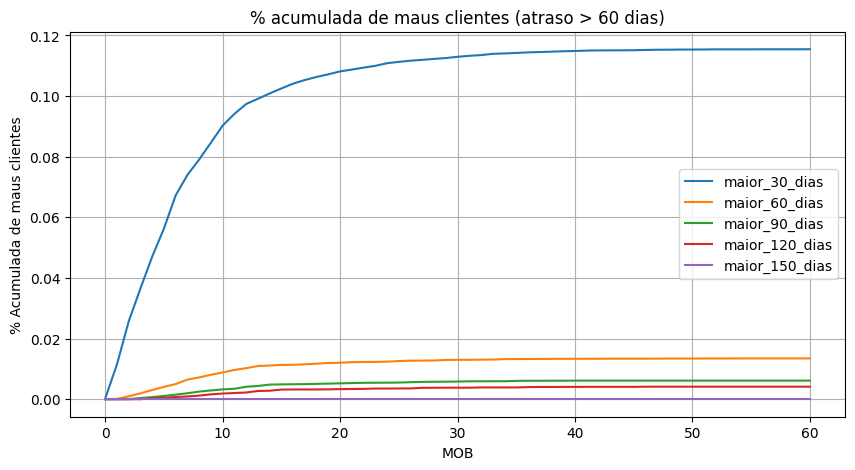

In [63]:
df_taxa_mau.plot(grid=True, title = '% acumulada de maus clientes (atraso > 60 dias)', figsize=(10,5))
plt.xlabel('MOB')
plt.ylabel('% Acumulada de maus clientes')
plt.legend()

In [64]:
len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [65]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

In [66]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0

df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

<ipython-input-66-6ccb2b6fae50>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()


,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [67]:
df_registros_creditos_id.shape

(30918, 2)

In [68]:
df_registro_clientes_targets = df_cadastrados_limpo.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro,0
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro,0
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança,0
3,5008810,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
4,5008811,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0


In [69]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

,proportion
Mau,
0,97.71126
1,2.28874


# Aula 3 - Machine Learning: Construindo a Pipeline

## Video - Machine Learning: Construindo a Pipeline I

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
SEED = 1561651

In [72]:
#Seperando a Base Treino e Teste
df_treino, df_teste = train_test_split(df_registro_clientes_targets, test_size=0.2, random_state=SEED)

In [73]:
df_treino.shape, df_teste.shape

((18735, 16), (4684, 16))

In [74]:
# Copiando os DF
df_treino_copy = df_treino.copy()
df_teste_copy = df_teste.copy()

In [75]:
# Salvando o DF em CSV
df_treino_copy.to_csv('df_treino.csv', index=False)
df_teste_copy.to_csv('df_teste.csv', index=False)

In [76]:
df_treino.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
12599,5088863,1,1,0,0,1,2.0,270000.0,56.518614,17.675928,Empregado,Ensino superior,Casado,Casa/apartamento próprio,Equipe principal,0
1633,5021997,0,1,0,0,1,2.0,90000.0,51.645140,4.501119,Associado comercial,Ensino médio,Casado,Casa/apartamento próprio,Outro,0
9532,5061658,0,0,0,0,0,1.0,252000.0,62.328453,0.000000,Pensionista,Ensino médio,Viúvo,Casa/apartamento próprio,Outro,0
19671,5126096,0,1,0,1,0,2.0,157500.0,57.416648,0.000000,Pensionista,Ensino médio,Casado,Casa/apartamento próprio,Outro,0
17651,5114496,0,1,0,0,1,2.0,85500.0,56.964893,0.000000,Pensionista,Ensino médio,Casado,Casa/apartamento próprio,Outro,0


In [77]:
df_teste.head()


,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
9257,5061203,0,1,0,0,1,4.0,270000.0,29.856876,5.128100,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Construção Civil,0
16635,5105951,0,0,1,0,0,2.0,184500.0,40.323894,0.829586,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Construção Civil,0
16632,5105948,0,0,0,0,0,2.0,72000.0,26.467347,3.663320,Empregado,Ensino superior,Casado,Casa/apartamento próprio,Equipe principal,0
21607,5142971,0,0,1,1,0,3.0,180000.0,29.175137,2.535302,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Construção Civil,0
18305,5116563,0,1,0,0,0,1.0,135000.0,45.156300,25.339329,Servidor público,Ensino superior,Divorciado,Casa/apartamento próprio,Equipe principal,0


In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE

In [79]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['ID_Cliente']):
        self.feature_to_drop = feature_to_drop

    def fit(self,df):
        return self

    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [80]:
class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self, min_max_scaler = ['Tamanho', 'Rendimento_anual', 'Idade', 'Anos_empregado']):
        self.min_max_scaler = min_max_scaler

    def fit(self, df):
        return self

    def transform(self, df):
        if (set(self.min_max_scaler ).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler ])
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df


## Video - Machine Learning: Construindo a Pipeline II

In [81]:
class OneHotEncodingNames(BaseEstimator,TransformerMixin):
    def __init__(self,OneHotEncoding = ['Estado_civil', 'Moradia', 'Categoria_de_renda', 'Ocupacao']):

        self.OneHotEncoding = OneHotEncoding

    def fit(self,df):
        return self

    def transform(self,df):
        if (set(self.OneHotEncoding).issubset(df.columns)):
            # função para one-hot-encoding das features
            def one_hot_enc(df, OneHotEncoding):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[OneHotEncoding])
                # obtendo o resultado dos nomes das colunas
                feature_names = one_hot_enc.get_feature_names_out(OneHotEncoding)
                # mudando o array do one hot encoding para um dataframe com os nomes das colunas
                df = pd.DataFrame(one_hot_enc.transform(df[self.OneHotEncoding]).toarray(),
                                  columns= feature_names,index=df.index)
                return df

            # função para concatenar as features com aquelas que não passaram pelo one-hot-encoding
            def concat_with_rest(df,one_hot_enc_df,OneHotEncoding):
                # get the rest of the features
                outras_features = [feature for feature in df.columns if feature not in OneHotEncoding]
                # concaternar o restante das features com as features que passaram pelo one-hot-encoding
                df_concat = pd.concat([one_hot_enc_df, df[outras_features]],axis=1)
                return df_concat

            # one hot encoded dataframe
            df_OneHotEncoding = one_hot_enc(df,self.OneHotEncoding)

            # retorna o dataframe concatenado
            df_full = concat_with_rest(df, df_OneHotEncoding,self.OneHotEncoding)
            return df_full

        else:
            print('Uma ou mais features não estão no DataFrame')
            return df


In [82]:
class OrdinalFeature(BaseEstimator, TransformerMixin):
  def __init__(self, ordinal_feature = ['Grau_escolaridade']):
    self.ordinal_feature = ordinal_feature

  def fit(self, df):
    return self

  def transform(self, df):
        if 'Grau_escolaridade' in df.columns:
            ordinal_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ordinal_encoder.fit_transform(df[self.ordinal_feature])
            return df
        else:
            print("Grau_escolaridade não está no DataFrame")
            return df


In [83]:
class OverSample(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass

  def fit(self, df):
    return self

  def transform(self, df):
        if 'Mau' in df.columns:
            # função smote para superamostrar a classe minoritária para corrigir os dados desbalanceados
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'Mau'], df['Mau'])
            df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return df_bal
        else:
            print("O target não está no DataFrame")
            return df

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
def pipeline(df):
  pipeline = Pipeline([
      ('feature_dropper', DropFeatures()), # Retirar a coluna ID_Cliente
      ('min_max_scaler', MinMax()), # Transformar as variaveis numericas
      ('one_hot_encoder', OneHotEncodingNames()), # Transformar as variaveis string em numericas
      ('ordinal_features', OrdinalFeature()), # Transformar o grau de escolaridade em numeros
      ('oversample', OverSample()) # balancer os dados com classes 0 e 1
  ])

  df_pipeline = pipeline.fit_transform(df)
  return df_pipeline

# Aula 4 - Machine Learning: Escolhendo o Melhor Modelo

## Video - Modelo I

In [86]:
treino = pipeline(df_treino)

Uma ou mais features não estão no DataFrame


In [87]:
treino.head()

,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,Moradia_Apartamento alugado,Moradia_Apartamento comercial,Moradia_Casa/apartamento próprio,Moradia_Cooperativa habitacional,Moradia_Habitação pública,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Mau
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,2.0,270000.0,56.518614,17.675928,2.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,2.0,90000.0,51.645140,4.501119,1.0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1.0,252000.0,62.328453,0.000000,1.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,2.0,157500.0,57.416648,0.000000,1.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,2.0,85500.0,56.964893,0.000000,1.0,0


In [88]:
treino['Mau'].value_counts(normalize=True)*100

,proportion
Mau,
0,50.0
1,50.0


In [89]:
treino.shape

(36624, 46)

In [90]:
x_treino, y_treino = treino.loc[:, treino.columns != 'Mau'], treino['Mau']

In [91]:
teste = pipeline(df_teste)

Uma ou mais features não estão no DataFrame


In [92]:
teste.head()

,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,Moradia_Apartamento alugado,Moradia_Apartamento comercial,Moradia_Casa/apartamento próprio,Moradia_Cooperativa habitacional,Moradia_Habitação pública,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Mau
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,4.0,270000.0,29.856876,5.128100,1.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,2.0,184500.0,40.323894,0.829586,1.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,2.0,72000.0,26.467347,3.663320,2.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,3.0,180000.0,29.175137,2.535302,1.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1.0,135000.0,45.156300,25.339329,2.0,0


In [93]:
teste.shape

(9142, 46)

In [94]:
x_teste, y_teste = teste.loc[:, teste.columns != 'Mau'], teste['Mau']

In [95]:
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,ConfusionMatrixDisplay,RocCurveDisplay
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Video - Modelo II

In [96]:
SEED = 1561651

def roda_modelo(modelo):


    # Treinando modelo com os dados de treino

    modelo.fit(x_treino, y_treino)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_teste)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc = roc_auc_score(y_teste, prob_predic[:,1])
    print(f"AUC {auc}")

    # Separando a probabilidade de ser bom e mau, e calculando o KS
    #métrica KS: probabilidade de um cliente ser classificado como bom ou mau.
    data_bom = np.sort(modelo.predict_proba(x_teste)[:, 0])
    data_mau = np.sort(modelo.predict_proba(x_teste)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)

    print(f"Métrica KS: {kstest}")

    print("\nConfusion Matrix\n")

        # Criando matriz de confusão
    fig, ax = plt.subplots(figsize=(7,7))
    matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, x_teste, y_teste, normalize='true',
                                            display_labels=['Bom pagador', 'Mau pagador'],
                                            ax=ax, cmap=plt.cm.Blues)
    ax.set_title("Matriz de Confusão\n Normalizada", fontsize=16, fontweight="bold")
    ax.set_xlabel("Label predita", fontsize=18)
    ax.set_ylabel("Label verdadeira", fontsize=18)
    plt.grid(False)
    plt.show(matriz_confusao)


    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_teste)
    print("\nClassification Report")
    print(classification_report(y_teste, predicao, zero_division=0))


    print("\nRoc Curve\n")
    metrics.RocCurveDisplay.from_estimator(modelo, x_teste, y_teste)

## Video - Modelo III


### Machine Learne - LogisticRegression

In [97]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()


------------------------------Resultados LogisticRegression()------------------------------

AUC 0.7855036754259266
Métrica KS: KstestResult(statistic=0.09429008969590899, pvalue=8.950885678925701e-36, statistic_location=0.5279022267189053, statistic_sign=1)

Confusion Matrix



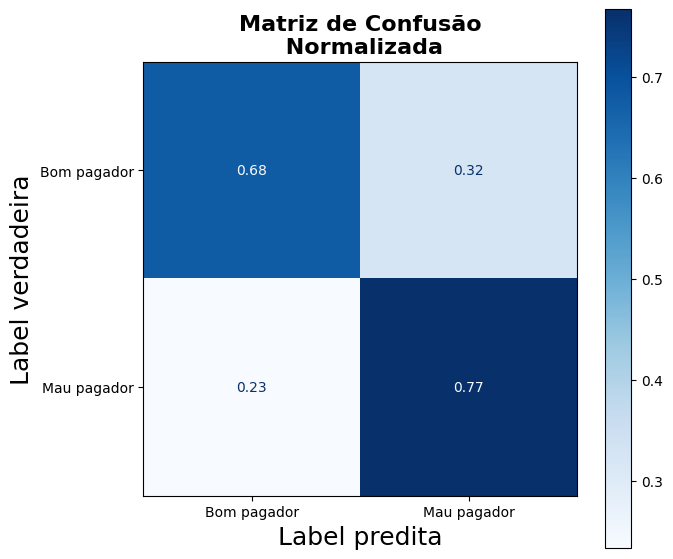


Classification Report
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      4571
           1       0.70      0.77      0.73      4571

    accuracy                           0.72      9142
   macro avg       0.72      0.72      0.72      9142
weighted avg       0.72      0.72      0.72      9142


Roc Curve



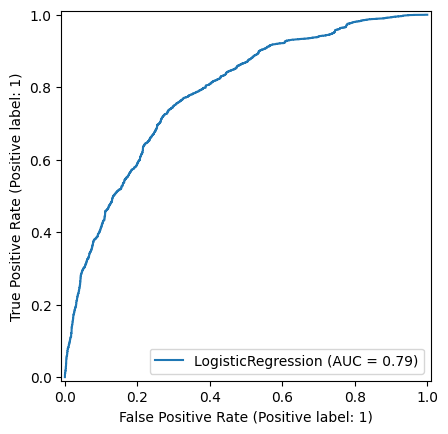

In [98]:
roda_modelo(modelo_logistico)

### Machine Learne - DecisionTree (Arvore de decisão)

In [100]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC 0.9322603272387568
Métrica KS: KstestResult(statistic=0.11857361627652592, pvalue=2.2440761546899205e-56, statistic_location=0.9946236559139785, statistic_sign=-1)

Confusion Matrix



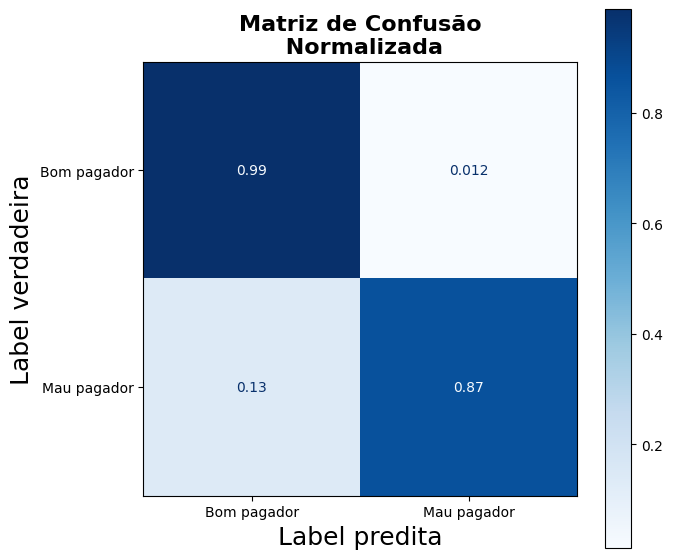


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4571
           1       0.99      0.87      0.92      4571

    accuracy                           0.93      9142
   macro avg       0.93      0.93      0.93      9142
weighted avg       0.93      0.93      0.93      9142


Roc Curve



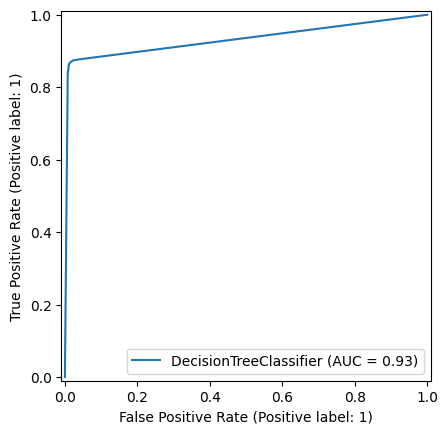

In [101]:
roda_modelo(modelo_tree)

### Machine Learne - RandomForest (xxx)

In [103]:
from sklearn.ensemble import RandomForestClassifier
modelo_forest = RandomForestClassifier()


------------------------------Resultados RandomForestClassifier()------------------------------

AUC 0.9858179420630026
Métrica KS: KstestResult(statistic=0.27860424414788887, pvalue=1.059338977953e-312, statistic_location=0.98, statistic_sign=-1)

Confusion Matrix



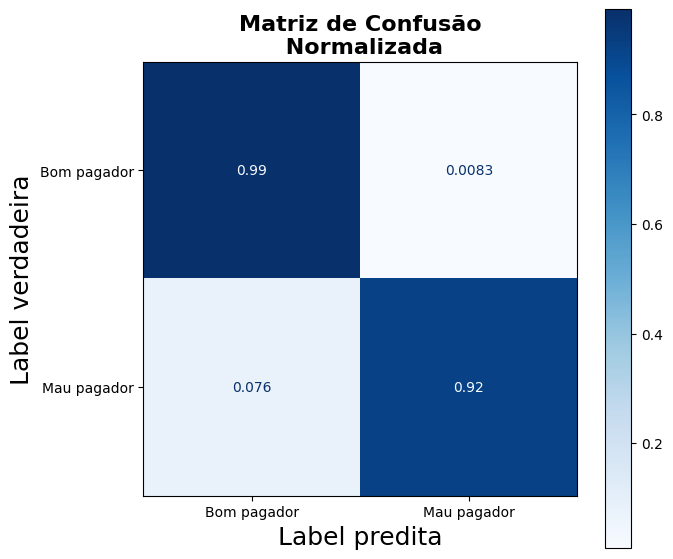


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4571
           1       0.99      0.92      0.96      4571

    accuracy                           0.96      9142
   macro avg       0.96      0.96      0.96      9142
weighted avg       0.96      0.96      0.96      9142


Roc Curve



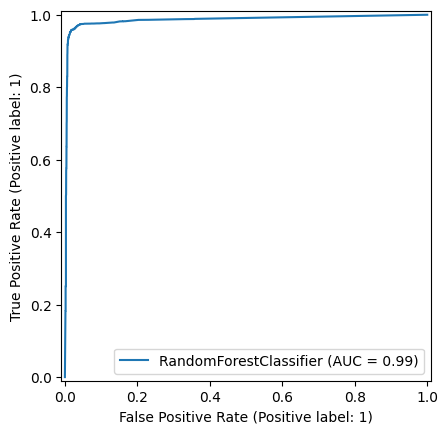

In [104]:
roda_modelo(modelo_forest)

### Machine Learne - GradientBoosting (xxx)


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier()


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC 0.9812162951149564
Métrica KS: KstestResult(statistic=0.27729162108947714, pvalue=1.000459380572627e-309, statistic_location=0.0747192373161466, statistic_sign=1)

Confusion Matrix



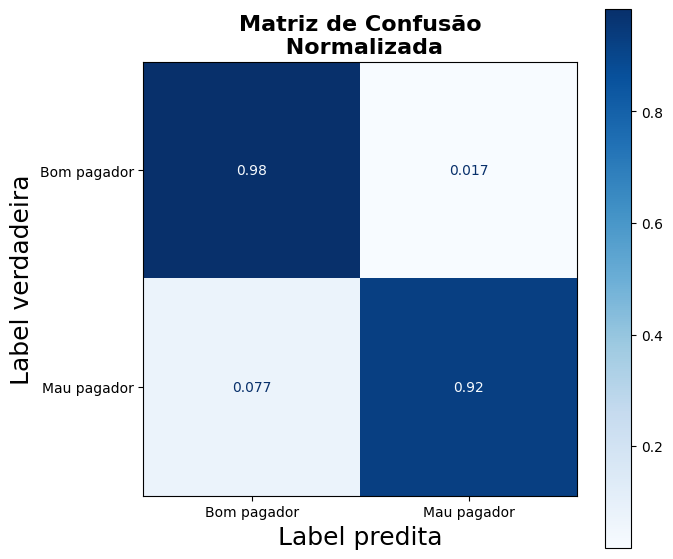


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4571
           1       0.98      0.92      0.95      4571

    accuracy                           0.95      9142
   macro avg       0.95      0.95      0.95      9142
weighted avg       0.95      0.95      0.95      9142


Roc Curve



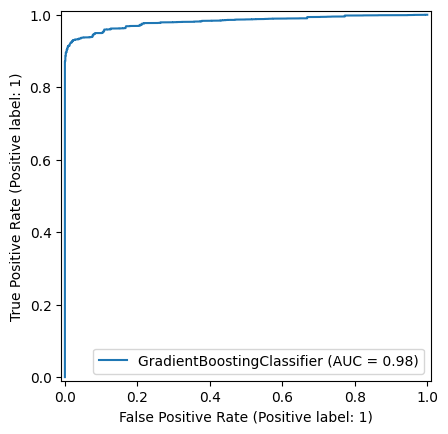

In [102]:
roda_modelo(modelo_xgb)

In [105]:
import joblib

In [106]:
joblib.dump(modelo_xgb, 'xgb.joblib')

['xgb.joblib']